# Hands-on experiment 2

## k-means Clustering with Semidefinite Programming

Clustering is an unsupervised machine learning problem in which we try to partition a given dataset into $k$ subsets based on distance between data points or similarity among them. The goal is to find $k$ centers and to assign each data point to one of the centers such that the sum of the square distances between them are minimal [1]. This problem is known to be NP-hard. 

#### Clustering problem
Given a set of $n$ points in a $d-$dimensional Euclidean space, denoted by
\begin{equation*}
S = \{ \mathbf{s}_i = (s_{i1}, \cdots, s_{id})^\top~\in \mathbb{R}^d ~~ i = 1, \cdots, n\}
\end{equation*}
find an assignment of the $n$ points into $k$ disjoint clusters $\mathcal{S} = (S_1, \cdots, S_k)$ whose centers are $\mathbf{c}_j(j = 1, \cdots, k)$ based on the total sum of squared Euclidean distances from each point $\mathbf{s}_i$ to its assigned cluster centroid $\mathbf{c}_i$, i.e.,
\begin{equation}
f(S,\mathcal{S}) = \sum_{j=1}^k\sum_{i=1}^{|S_j|}\|\mathbf{s}_i^{j} - \mathbf{c}_j \|^2,
\label{eq:cluster}\tag{Clustering Problem}
\end{equation}
where $|S_j|$ is the number of points in $S_j$, and $\mathbf{s}_i^{j} $ is the $i^{th}$ point in $S_j$.

#### Lloyd's algorithm for k-means



  **1.** Choose initial cluster centers $\mathbf{c}_1, \mathbf{c}_2, \cdots , \mathbf{c}_k$
  
  **2.** Repeat until convergence:
  $$\begin{cases}
  \text{Assignment step: }~~  \mathbf{s}_i ~~\text{belongs to cluster } j\text{, where} j := \text{argmin}_{j \in [1,k]} \|\mathbf{s}_i-\mathbf{c}_j\|   \\
  \text{Update each cluster center: }~~~~~~~~ \mathbf{c}_j = \frac 1{|S_j|} \sum_{i=1}^{|S_j|} \mathbf{s}_i^{j} \\
  \end{cases}$$


Note that the algorithm converges to local optimal points, so
\eqref{eq:cluster} can be arbitrarily bad depending on the
initialization of the cluster centers.

**SDP relaxation of the problem:** The work (Peng & Wei, 2007)
proposes an SDP-relaxation to approximately solve the aforementioned
model-free $k-$means clustering problem. The resulting optimization
problem (See section (2) of (Peng & Wei, 2007) for details of this
    relaxation and Lecture 13 for a brief introduction.) takes the standard semidefinite programming form

$$\mathbf{X}^\star \in \arg \min_{ \mathbf{X} } \bigg\{ \langle \boldsymbol{C}, \mathbf{X} \rangle : ~\underbrace{\mathbf{X} \mathbf{1} =  \mathbf{1}}_{A_1(\mathbf{X}) = b_1},\underbrace{~\mathbf{X}^{\top} \mathbf{1} = \mathbf{1}}_{A_2(\mathbf{X}) = b_2},~\underbrace{\mathbf{X} \geq 0}_{B(\mathbf{X}) \in \mathcal{K}},~\underbrace{\mathrm{Tr}(\mathbf{X}) \leq \kappa, ~\mathbf{X} \in \mathbb{R}^{p\times p} ,~\mathbf{X}\succeq 0 }_{\mathcal{X}} \bigg\},
\label{prob1}\tag{Problem 1}$$ 
where $C \in \mathbb{R}^{p \times p}$ is the
Euclidean distance matrix between the data points.
$\mathrm{Tr}(\mathbf{X}) \leq \kappa$ enforces approximately low-rank
solutions, the linear inclusion constraint $\mathbf{X} \geq 0$ is element-wise
nonnegativity of ${\mathbf{X}}$, the linear equality constraints
$\mathbf{X}\mathbf{1} = \mathbf{1}$ and $\mathbf{X}^{\top} \mathbf{1} = \mathbf{1}$
require row and column sums of $\mathbf{X}$ to be equal to 1's, and
$\mathbf{X} \succeq 0$ means that $\mathbf{X}$ is positive semi-definite. Recall that
$\mathrm{Tr}(\mathbf{X}) = \|\mathbf{X}\|_\ast$ for any positive semi-definite matrix
$\mathbf{X}$.

**Algorithm 1.** The SDP in \eqref{prob1} can be reformulated as $$
\min_{x \in \mathcal{X}}~~~ f(x) + g_1(A_1(x)) + g_2(A_2(x)) \qquad\text{subject to}\qquad B(x) \in \mathcal{K}, \label{prob2}\tag{Equation 2}$$ where $f(x) = \langle  \boldsymbol{C}, x \rangle$ is a
smooth convex function, $g_1=\delta_{\{b_1\}}(\cdot)$ is the indicator
function of singleton $\{b_1\}$, $g_2=\delta_{\{b_2\}}(\cdot)$ is the
indicator function of singleton $\{b_2\}$ and ${\mathcal{K}}$ is the
positive orthant for which computing the projection is easy.

Note that the classical Frank-Wolfe method does not apply to this
problem due to nonsmooth terms $g_1, g_2$. In the sequel, we will
attempt to solve this problem with the HomotopyCGM method proposed in
(Yurtsever et al., 2018) to handle the non-smooth problems with a
conditional gradient based method.


**Algorithm 2.** Another option for solving this problem is Vu-Condat
method we have seen in Lecture 12. For solving the problem
$ \begin{equation} \min_x f(x) + g(A(x)) + h(x) \end{equation}$ where,
$f(x) = \langle \boldsymbol{C}, x \rangle$ and
$h(x) = \delta_{\mathcal{X}}(x)$. Moreover,
$g(A(x)) = g_1(A_1 (x)) + g_2(A_2 (x)) + \delta_{\mathcal{K}}(Bx)$ for a
suitably defined $g$ and $A$. In particular, define $$\begin{aligned} 
z  = \begin{bmatrix} z_1 \\ z_2 \\ z_3 \end{bmatrix} = \begin{bmatrix}A_1x \\ A_2 x \\ Bx \end{bmatrix},~~~~~A = \begin{bmatrix} A_1 \\ A_2 \\ B \end{bmatrix}~~~~\Rightarrow~~~~~z= A(x),
\end{aligned}\tag{Definition of A}$$ and $$\tag{Definition of g}
g(z) = \delta_{\{b_1\}}(z_1) + \delta_{\{b_2\}}(z_2) + \delta_\mathcal{K}(z_3).$$
Vu-Condat algorithm iterates as follows (recall that $g^\ast$ denotes
the conjugate function of $g$):


## 2.1 Theory

#### Questions 2.1.1 (5 pts) Characterizing the domain

Show that the domain $\mathcal{X} = \{\mathbf{X}: \mathrm{Tr}(\mathbf{X}) \leq \kappa,~\mathbf{X} \in \mathbb{C}^{p\times p} ,~\mathbf{X} \succeq 0\}$ is a convex set. For this purpose, apply the definition of set convexity.


We aim to show that $(\forall X \in \mathcal{X})(\forall Y \in \mathcal{X})(\forall \alpha \in \left[0, 1\right]): \alpha X + (1 - \alpha) Y \in \mathcal{X}$. Let $X, Y \in \mathcal{X}$ be arbitrary. Then, $\mathrm{Tr}(\alpha X + (1 - \alpha) Y) = \alpha \mathrm{Tr}(X) + (1 - \alpha)\mathrm{Tr}(Y) \leq \alpha \kappa + (1 - \alpha) \kappa = \kappa$. Furthermore, $\alpha X + (1 - \alpha) Y \in \mathbb{C}^{p \times p}$. Finally, $X \succeq 0$ and $Y \succeq 0$. Thus, $\forall u: u^T X u \geq 0$ and $\forall u: u^T Y u \geq 0$. Then, $\forall u: \alpha u^T X u + (1 - \alpha) u^T Y u = u^T (\alpha X + (1 - \alpha) Y) u$, meaning $\alpha X + (1 - \alpha) Y \succeq 0$. Hence, $\alpha X + (1 - \alpha) Y \in \mathcal{X}$. This proves the statement that the domain $\mathcal{X}$ is a convex set.

#### Question 2.1.2  (10 pts) Gradient of the penalized objective

Given a linear inclusion constraint $Tx \in \mathcal{Y}$,
the corresponding quadratic penalty function is given by
$$\text{QP}_\mathcal{Y}(x) = \text{dist}^2(Tx, \mathcal{Y}) = \min_{y \in \mathcal{Y}} \| y-Tx\|^2.$$
Write down the constraints in (Equation 2) in
the quadratic penalty form and **show that** the penalized objective
takes the form
$$%\min_{x \in \mathcal{X}} % f(x) + g_{\beta} (A(x)) + h_{\beta} (B(x))  = 
f(x) + \frac{1}{2\beta} \|A_1(x) - b_1\|^2 + \frac{1}{2\beta} \|A_2(x) - b_2\|^2 + \frac{1}{2\beta}\text{dist}^2(x, \mathcal{K}),\tag{Equation 3}$$
and **show that** the gradient of the penalized objective is equal
to ${v_k/}{\beta}$ in the algorithm.\
(Hint: You can write
$\text{dist}^2(Tx, \mathcal{Y}) = \| y^\ast - Tx \|^2$, where
$y^\ast = \arg \min _{y\in \mathcal{Y}} \| y - Tx \|^2$. and take
the derivative with respect to $\mathbf{X}$ without worrying about
$y^\ast$ depending on $\mathbf{X}$, thanks to Danskin's theorem
(*cf.*, Lecture 10).)






The first constraint, $\delta_{\{b_1\}}(A_1(x))$, ensures that $A_1(x) = b_1$. Its corresponding quadratic penalty function is $\mathrm{dist}^2(A_1(x), \{b_1\}) = \Vert b_1 - A_1(x) \Vert^2$. Similarly, for the second constraint, $\delta_{\{b_2\}}(A_2(x))$, $\mathrm{dist}^2(A_2(x), \{b_2\}) = \Vert b_2 - A_2(x) \Vert^2$. For the final constraint, $B(x) \in \mathcal{K}$,  the quadratic penalty function is $QP_\mathcal{K}(x) = \mathrm{dist}^2(B(x), \mathcal{K}) = \mathrm{dist}^2(x, \mathcal{K})$. 

The penalized objective function will then replace the constraint with the above mentioned soft constraints. We also introduce a term $\frac{1}{2\beta}, \beta > 0$ to control the effect of the constraints on the objective function. The larger $\beta$ gets, the less the constraints contribute to the objective function. By replacing the constraints with those soft constraints, we obtain the following:

\begin{equation*}
\begin{aligned}
    f(x) & + g_1(A_1(x)) + g_2(A_2(x)) \qquad\text{s.t} \qquad B(x) \in \mathcal{K}\\
    f(x) & + \frac{1}{2\beta} (\Vert A_1(x) - b_1 \Vert^2 + \Vert A_2(x) - b_2 \Vert^2 + \mathrm{dist}^2(x, \mathcal{K}))
\end{aligned}
\end{equation*}

We first note that $\mathrm{dist}^2(x, \mathcal{K}) = \Vert x - k^* \Vert^2$, where $k^* = \arg\min_{k \in \mathcal{K}} \Vert x - k \Vert^2$. Taking the gradient of the full equation with respect to $x$ results in the following expression:

\begin{equation*}
    \nabla f(x) + \frac{1}{\beta} A_1^T(A_1(x) - b_1) + \frac{1}{\beta} A_2^T(A_2(x) - b_2) + \frac{1}{\beta} (x - k^*)
\end{equation*}

Here, we used Danskin's theorem to treat $k^*$ as a function that is not dependent on $x$.

#### Question 2.1.3 (5 pts) 

Write down $v_k$ explicitly by deriving the gradient and projection specific to (Equation 2)



We have computed the gradient in the question above. Then, if $\frac{v_k}{\beta}$ is the gradient, we obtain the following for $v_k$:

$v_k = \beta \nabla f(x) + A_1^T(A_1(x) - b_1) + A_2^T(A_2(x) - b_2) + (x - k^*)$

#### Question 2.1.4 (5 pts) 

Using the definitions we used for $g$ and $A$
in (Definition of A)
and (Definition of g), show that the $y^{k+1}$ update step of
Vu-Condat can be written in the form
$$y^{k+1} := \begin{bmatrix} y_1^{k+1} \\ y_2^{k+1} \\ y_3^{k+1} \end{bmatrix} = \begin{bmatrix} y_1^k \\ y_2^k \\ y_3^k \end{bmatrix} +\sigma \begin{bmatrix} A_1\tilde x^{k+1} - b_1 \\ A_2\tilde x^{k+1} - b_2 \\ \tilde x^{k+1} - \mathrm{proj}_{\mathcal{K}}(\sigma^{-1}y_3^k + \tilde x^{k+1}) \end{bmatrix},$$
and
$$A^\top y^{k+1} = A^\top y^k + \sigma (A_1^\top(A_1 (\tilde x^{k+1}) - b_1) + A_2^\top (A_2 (\tilde x^{k+1}) - b_2) + \tilde x^{k+1} - \mathrm{proj}_{\mathcal{K}}(\sigma^{-1}y^k_3 + \tilde x^{k+1})),$$
where the vector $y$ in the dual domain can be written in the form
$y = [y_1~,~y_2~,~y_3]^\top$ with $y_1, y_2\in\mathbb{R}^p$ and
$y_3 \in\mathbb{R}^{p^2}$ (see
also (Definition of A)).

**Hint**: Use Moreau's decomposition to write the update using
$\mathrm{prox}_{g}$ instead of $\mathrm{prox}_{g^\ast}$. In
particular
$$y^{k+1} = \mathrm{prox}_{\sigma g^\ast}(y^k + \sigma A(\tilde x^{k+1})) = y^k + \sigma A( \tilde x^{k+1}) - \sigma \mathrm{prox}_{\sigma^{-1} g}(\sigma^{-1}y^k + A(\tilde x^{k+1})) \\
%&= y^k + \sigma (A_1\tilde x^{k+1} + A_2\tilde x^{k+1} + \tilde x^{k+1}) - \sigma (b_1+b_2+\mathrm{proj}_\mathcal{K}(\sigma^{-1}y^k + \tilde x^{k+1}))$$
The remaining steps are to
use (Definition of A) and find how to compute
$\mathrm{prox}_{g}$ when $g$ is in the decomposed form given
in (Definition of g).

As given above, by Moreau's decomposition, we can compute the update step as 

\begin{equation*}
\begin{aligned}
y^{k+1} & = \mathrm{prox}_{\sigma g^\ast}(y^k + \sigma A(\tilde x^{k+1}))\\
        & = y^k + \sigma A( \tilde x^{k+1}) - \sigma \mathrm{prox}_{\sigma^{-1} g}(\sigma^{-1}y^k + A(\tilde x^{k+1}))\\
        & = y^k + \sigma \begin{bmatrix} A_1\tilde x^{k+1} \\ A_2\tilde x^{k+1} \\ \tilde x^{k+1} \end{bmatrix} - \sigma \mathrm{prox}_{\sigma^{-1} g}\left(\sigma^{-1}y^k + \begin{bmatrix} A_1\tilde x^{k+1} \\ A_2\tilde x^{k+1} \\ \tilde x^{k+1} \end{bmatrix}\right) \text{ (By the definition of A)}
\end{aligned}
\end{equation*}

Now let's look into the proximal operator:

\begin{equation*}
\begin{aligned}
    \mathrm{prox}_{\sigma^{-1} g}\left(\sigma^{-1}y^k + \begin{bmatrix} A_1\tilde x^{k+1} \\ A_2\tilde x^{k+1} \\ \tilde x^{k+1} \end{bmatrix}\right) & = \arg \min_{y} \left(g(y) + \frac{\sigma}{2} \Vert y - \left(\sigma^{-1}y^k + \begin{bmatrix} A_1\tilde x^{k+1} \\ A_2\tilde x^{k+1} \\ \tilde x^{k+1} \end{bmatrix} \right) \Vert_2^2 \right)\\
    & = \arg \min_{y} \left(\delta_{\{b_1\}}(y_1) + \delta_{\{b_2\}}(y_2) + \delta_\mathcal{K}(y_3) + \frac{\sigma}{2} \Vert \begin{bmatrix} y_1 - \sigma^{-1}y^k_1 - A_1\tilde x^{k+1} \\ y_2 - \sigma^{-1}y^k_2 - A_2\tilde x^{k+1} \\ y_3 - \sigma^{-1}y^k_3 - \tilde x^{k+1} \end{bmatrix} \Vert_2^2 \right)\\
\end{aligned}
\end{equation*}

The proximal operator splits into three proximal operators, one for each cell in the vector. For the first two cells, their proximal operators' alternative formulations are minimized when $\delta_{\{b_1\}}(y_1) = 0$ and $\delta_{\{b_2\}}(y_2) = 0$. Thus, their solutions are $b_1$ and $b_2$. The proximal operator of the last cell is managable when $\delta_\mathcal{K}(y_3) = 0$, thus when $y_3 \in \mathcal{K}$. The operator becomes a projection operator: $\mathrm{proj}_{\mathcal{K}}(\sigma^{-1}y_3^k + \tilde x^{k+1}) = \arg\min_{y \in \mathcal{K}} \frac{\sigma}{2} \Vert y_3 - (\sigma^{-1}y^k_3 + \tilde x^{k+1}) \Vert_2^2$.

Coming back to the previous equation, we obtain the following:

\begin{equation*}
\begin{aligned}
y^{k+1} & = y^k + \sigma \begin{bmatrix} A_1\tilde x^{k+1} \\ A_2\tilde x^{k+1} \\ \tilde x^{k+1} \end{bmatrix} - \sigma \mathrm{prox}_{\sigma^{-1} g}\left(\sigma^{-1}y^k + \begin{bmatrix} A_1\tilde x^{k+1} \\ A_2\tilde x^{k+1} \\ \tilde x^{k+1} \end{bmatrix}\right)\\
        & = y^k + \sigma \begin{bmatrix} A_1\tilde x^{k+1} \\ A_2\tilde x^{k+1} \\ \tilde x^{k+1} \end{bmatrix} - \sigma \begin{bmatrix} b_1 \\ b_2 \\ \mathrm{proj}_{\mathcal{K}}(\sigma^{-1}y_3^k + \tilde x^{k+1}) \end{bmatrix}\\
        & = \begin{bmatrix} y^k_1 \\ y^k_2 \\ y^k_3 \end{bmatrix} + \sigma \begin{bmatrix} A_1\tilde x^{k+1} - b_1 \\ A_2\tilde x^{k+1} - b_2 \\ \tilde x^{k+1} - \mathrm{proj}_{\mathcal{K}}(\sigma^{-1}y_3^k + \tilde x^{k+1}) \end{bmatrix}
\end{aligned}
\end{equation*}

Finally, we know that $A^T = \begin{bmatrix} A_1^T & A_2^T & I \end{bmatrix}$, thus $A^Ty^{k+1}$ becomes the following:

$A^Ty^{k+1} = A^Ty^k + \sigma A^T \begin{bmatrix} A_1\tilde x^{k+1} - b_1 \\ A_2\tilde x^{k+1} - b_2 \\ \tilde x^{k+1} - \mathrm{proj}_{\mathcal{K}}(\sigma^{-1}y_3^k + \tilde x^{k+1}) \end{bmatrix} = A^Ty^k + \sigma(A_1^T(A_1\tilde x^{k+1} - b_1) + A_2^T(A_2\tilde x^{k+1} - b_2) + \tilde x^{k+1} - \mathrm{proj}_{\mathcal{K}}(\sigma^{-1}y_3^k + \tilde x^{k+1}))$.

## 2.2 Practice

In [1]:
from lib.part2.helpers import *
from lib.part2.Llyod_kmeans import *

### Define operators
We provide 2 operators and their conjugates:
1. `A1`: Linear operator that takes the row sums
2. `At2`: Conjugate of operator A1
3. `A2`: Linear operator that takes the column sums 
4. `At2`: Conjugate of operator A2

### Algorithm 1. Homotopy CGM

You will first implement Homotopy CGM which is defined below for the problem specified in (Equation 2).

  #### Homotopy Conditional Gradient Method (HCGM)
  ---------------------------------------------------------------------------------------------------------------------------------
  **1.** Choose $x^0 \in\mathcal{X}$ and $\beta_0 >  0$
  
  **2.** For $k=1, 2, \ldots$ perform:
  $$
  \begin{cases}
  \gamma_k &= 2/(k+1), ~~\text{and}~~ \beta_k = \beta_0 / \sqrt{k+1} \\
  v_k &= \beta_k \nabla f(x_k) + A_1^\top (A_1(x_k) - b_1) + A_2^\top (A_2(x_k) - b_2) + (x_k - \text{proj}_{\mathcal{K}}(x_k))\\
  \hat{x}^k &:= \mathrm{argmin}_{x \in \mathcal{X}} \left \langle  v_k,  x \right \rangle \\
  x^{k+1} &:= (1-\gamma_k)x^k + \gamma_k\hat{x}^k
  \end{cases}
  $$
  
  **3.** Output:$~x^{k+1}$
  
  ---------------------------------------------------------------------------------------------------------------------------------

HCGM is designed for solving constrained minimization problems of the form in (Equation 2). We define such a constrained problem in the following cell, where we specify an objective $f$ and a set of penalities $\{g_i\}$.


#### Question 2.2.0 (2 pts)

Fill in the missing parts.

In [41]:
f = Function(
    f = lambda X : np.sum(C.flatten()*X.flatten()),
    grad = lambda X: C
)

g1 = Function(
    f = lambda X : np.linalg.norm((A1(X) - b))**2,
    grad = lambda X: At1(A1(X) - b)
)

g2 = Function(
    f = lambda X : np.linalg.norm((A2(X) - b))**2,
    grad = lambda X: At2(A2(X) - b)
)

g3 = Function(
    f = lambda X : np.sqrt(np.sum(np.minimum(X,0)**2)),
    grad = lambda X: 1000*np.minimum(X, 0) # <-- fill in (x_k - proj_K(x_k))
)

p = ConstrainedProblem(f = f, penalties = [g1, g2, g3])


**Remark**: The 1000 factor in the term for $(x_k - \text{proj}_{\mathcal{K}}(x_k))$ in Algorithm 1 is in order to obtain a better practical convergence. This basically corresponds to having different penalty parameters for different constraints.

#### Question 2.2.1 (4 pts)

Complete the missing lines in the function
definitions of `HCGM`, which implements Homotopy CGM.

First implement the LMO. Note that here we have symmetric real matrices. Therefore, you can use `eigsh` from `scipy.sparse.linalg` instead of `svds` which is already imported.

In [87]:
def lmo(grad, kappa):
    # Fill all   
    lowest_eig, v = eigsh(grad, k=1, which='SA')  
    X_bar = kappa * (v @ v.T)
    
    if lowest_eig >= 0:
        return np.zeros(X_bar.shape)
    
    return X_bar

In [88]:
@dataclass
class HCGM_state(OptState):
    x_k: Matrix
    k: int
    beta0: float

In [89]:
def HCGM_initialize(f, Xzero, beta0):
    k = 0
    return HCGM_state(x_k = Xzero, k = k, beta0 = beta0)

For the update recall that a `ConstrainedProblem` can be unpacked as follows:

- `f` which is a `Function` that has a `grad` method
- `penalties` which is a list of functions each having a `grad` method

In [90]:
def HCGM_update(p : ConstrainedProblem, state : HCGM_state):
    f, penalties = p
    x_k, k, beta0 = state
    
    gamma_k = 2/(k+1)
    beta_k = beta0/((k+1)**0.5)
    
    v_k = beta_k*f.grad(x_k) + penalties[0].grad(x_k) + penalties[1].grad(x_k) + penalties[2].grad(x_k)
    
    X_bar = lmo(v_k, kappa)
    
    X_next = (1 - gamma_k)*x_k + gamma_k*X_bar
    
    return HCGM_state(x_k = X_next, k = k+1, beta0 = beta0)

In [91]:
HCGM = OptAlgorithm(name="HCGM", init_state = HCGM_initialize, state_update = HCGM_update)

#### Question 2.2.2 (1 pts) Run HCGM

Run `HCGM` for $5000$-iterations and plot the result.

In [92]:
X_HCGM, f1_HCGM, f2_HCGM, f3_HCGM, obj_HCGM, iter_HCGM, time_HCGM = run_HCGM(HCGM, p, maxit=5000, beta0=1.0)

  0%|          | 0/5000 [00:00<?, ?it/s]

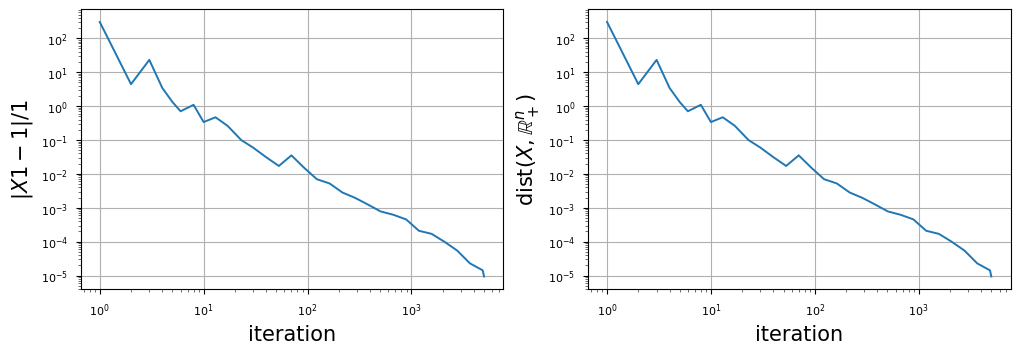

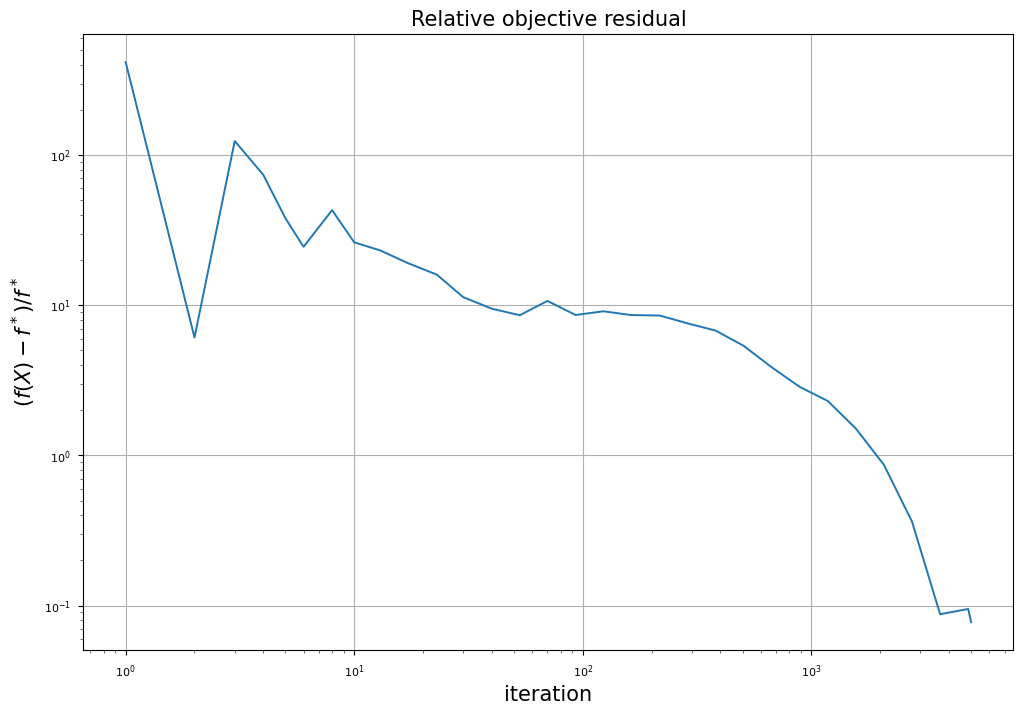

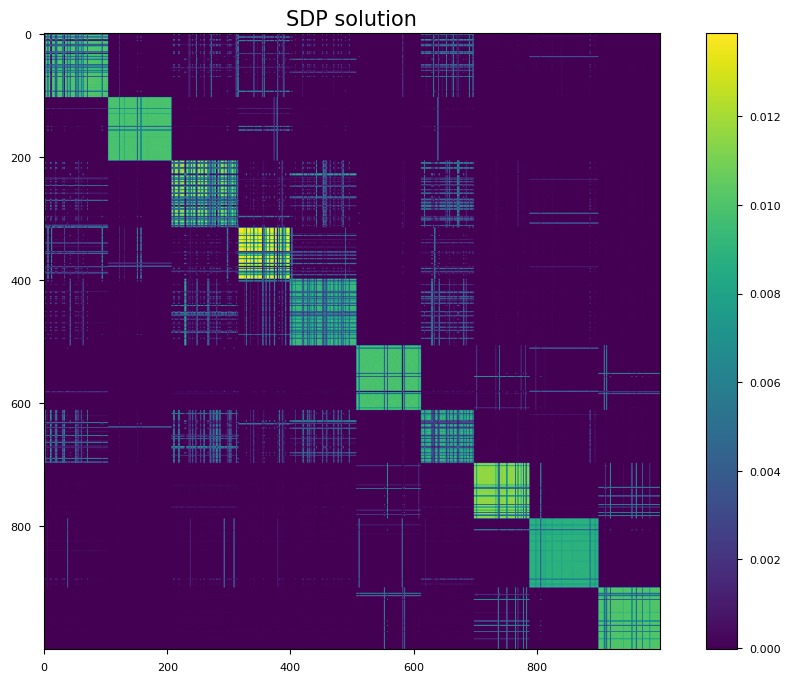

In [93]:
plot_func(iter_HCGM, f1_HCGM,f2_HCGM, obj_HCGM, X_HCGM, opt_val)

### Algorithm 2. Vu-Condat

Recall the Vu-Condat algorithm can be used to solve the problem
$$ \begin{equation} \min_x f(x) + g(A(x)) + h(x) \end{equation}$$ where,
$f(x) = \langle \boldsymbol{C}, x \rangle$ and
$h(x) = \delta_{\mathcal{X}}(x)$. Moreover,
$g(A(x)) = g_1(A_1 (x)) + g_2(A_2 (x)) + \delta_{\mathcal{K}}(Bx)$ for a
suitably defined $g$ and $A$. In particular, define $$\begin{aligned} 
z  = \begin{bmatrix} z_1 \\ z_2 \\ z_3 \end{bmatrix} = \begin{bmatrix}A_1x \\ A_2 x \\ Bx \end{bmatrix},~~~~~A = \begin{bmatrix} A_1 \\ A_2 \\ B \end{bmatrix}~~~~\Rightarrow~~~~~z= A(x),
\end{aligned}\tag{Definition of A}$$ and $$\tag{Definition of g}
g(z) = \delta_{\{b_1\}}(z_1) + \delta_{\{b_2\}}(z_2) + \delta_\mathcal{K}(z_3).$$

#### Question 2.2.3 (2 pts)

To implement Vu-Condat we need to specify the proximal operator of $h$ and $g^*$ as well as the linear operator $A$. We do so in the following cell. Note that the `DualVariable` class is created to keep track of all three dual variable $(y_1,y_2,y_3)$ in a concise way.
In the following cells fill in the proximal operators of $h$ and $g$.

**Hint**: Recall that the proximal operator of an indicator function is a projection. We give you `projSDP(X,kappa)` and (global variable) `kappa`, which projects onto $\mathcal X$. Further, the proximal operator of a seperable sum is a concatenation of the proximal operators of each term (see the lecture on proximal methods).

In [107]:
f = Function(
    f = lambda X : np.sum(C.flatten()*X.flatten()),
    grad = lambda X : C
)

h = Function(
    f = lambda X : 0 if (ispsd(X) and np.trace(X) <= kappa) else float('inf') ,
    prox = lambda tau, X: projSDP(X, kappa)
)

g = Function(
    f = lambda y: 0 if (y.y_1==b) and (y.y_2==b) and (np.all(y.y_3 >=0)) else float('inf'),
    prox = lambda sigma, y: DualVariable(b, b, np.where(y.y_3 < 0, 0, y.y_3))
)

def A(x):
    return DualVariable(A1(x), A2(x), x)

def A_T(y):
    return At1(y.y_1)+ At2(y.y_2)+ y.y_3

composite = (f, g, h, A, A_T)

With the problem formulation in place we can specify the Vu-Condat algorithm.

#### Vu-Condat method
  ------------------------------------------------------------------------------------------------------------------------------
  **1.** Choose $x^0 \in\mathcal{X}, y^0\in\mathbb{R}^{2p+p^2}$ and $\tau, \sigma >  0$
  
  **2.** For $k=1, 2, \ldots$ perform:
  $$\begin{cases}
  x^{k+1} &= \mathrm{prox}_{\tau h}(x^k - \tau (\nabla f(x^k) + A^\top y^k)) \\
  \bar x^{k+1} &= 2x^{k+1} - x^k \\
  y^{k+1} &= \mathrm{prox}_{\sigma g^\ast}(y^k + \sigma A(\bar x^{k+1}))
  %\gamma_k &= 2/(k+1), ~~\text{and}~~ \beta_k = \beta_0 / \sqrt{k+1} \\
  %v_k &= \beta_k \nabla f(x_k) + A_1^\top (A_1x_k - b_1) + A_2^\top (A_2x_k - b_2) + (x_k - \text{proj}_{\mathcal{K}}(x_k))\\
  %\hat{x}^k &:= \mathrm{argmin}_{x \in \mathcal{X}} \left \langle  v_k,  x \right \rangle \\
  %x^{k+1} &:= (1-\gamma_k)x^k + \gamma_k\hat{x}^k
  \end{cases}$$ 
  
  **3.Output: $~x^k$**
  
  ---------------------------------------------------------------------------------------------------------------------------------


#### Question 2.2.4 (4 pts)

Complete the missing lines in the function
definitions of `PDHG`, which implements the Vu-Condat method. 

**Remarks:** 

- In our case, we advise you to **multiply the step-size for $y_3$ by $10^4$** to obtain a better practical convergence. It is possible to use different dual step sizes, $\{ \sigma_1 , \sigma_2, \sigma_3 \}$.  Such a diagonal variable stepsize is supported through `[sigma1, sigma2, sigma3]*dual_variable`.
- The algorithm needs the proximal operator of $g^*$, the Fenchel dual of $g$, using the Moreau identity express the prox of $g^*$ in terms of the prox of $g$. You will need to multiply by the stepsize `Sigma` and its inverse `Sigma_inv` which we provide in the code below.

In [108]:
@dataclass
class PDHG_state(OptState):
    x_k: Matrix
    y_k: DualVariable(Vector, Vector, Matrix)
    tau: float
    sigma: float

In [109]:
def PDHG_initialize(composite, x_zero):
    L = 1e2
    tau = 1/L
    return PDHG_state(x_k = x_zero, y_k = A(x_zero), tau=tau, sigma=1/(L**2*tau))

def PDHG_update(composite, state):
    f, g, h, A, A_T = composite
    y_k = state.y_k
    x_k, _, tau, sigma = state
    
    next_x_k = h.prox(tau, x_k - tau*(f.grad(x_k) + A_T(y_k)))

    x_bar = 2*next_x_k - x_k
    
    Sigma = [sigma, sigma, sigma*1e4]
    Sigma_inv = [1/sigma, 1/sigma, 1/(sigma*1e4)]
    next_y_k = y_k + Sigma*A(x_bar) - Sigma*g.prox(Sigma, Sigma_inv * y_k + A(x_bar))
    
    return PDHG_state(next_x_k, next_y_k, tau, sigma)

In [110]:
PDHG = OptAlgorithm(name="PDHG", init_state = PDHG_initialize, state_update = PDHG_update)

#### Question 2.2.5 (1 pts) Run Vu-Condat

Run `PDHG` for $1000$-iterations and plot the result.

In [111]:
X_PDHG, f1_PDHG, f2_PDHG, obj_PDHG, iter_PDHG, time_PDHG = run_PDHG(PDHG, composite, maxit=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

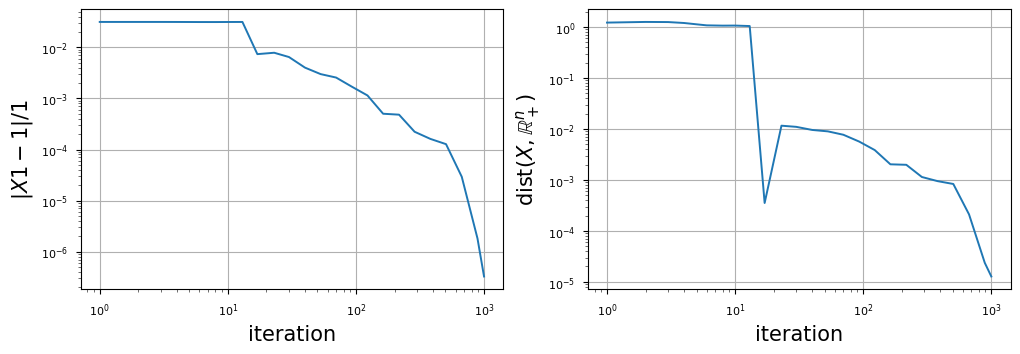

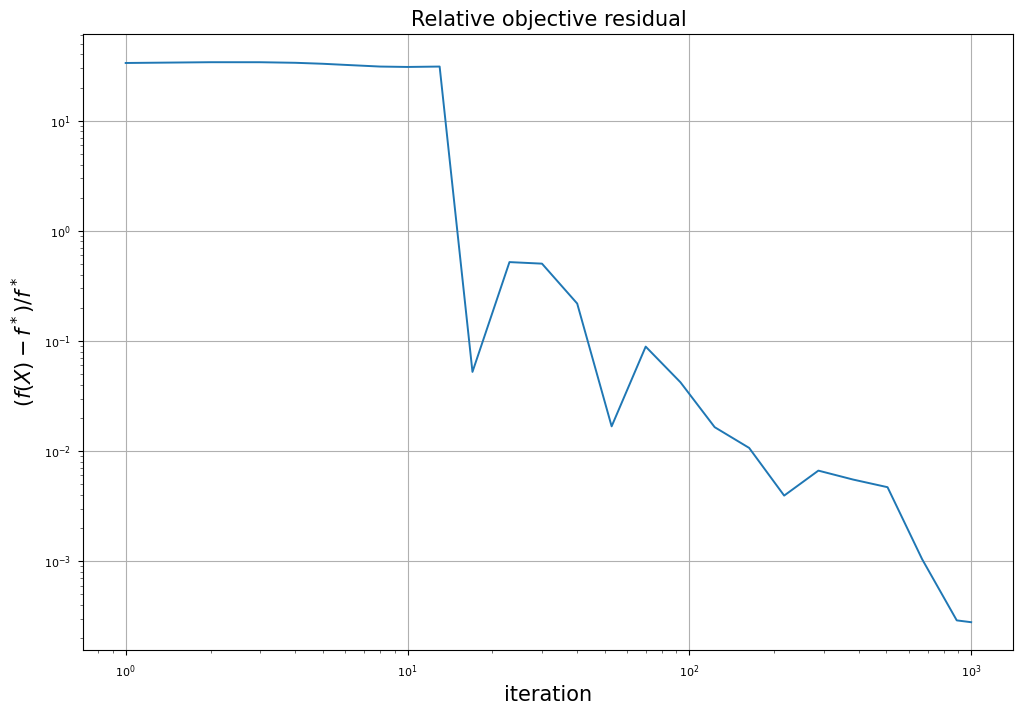

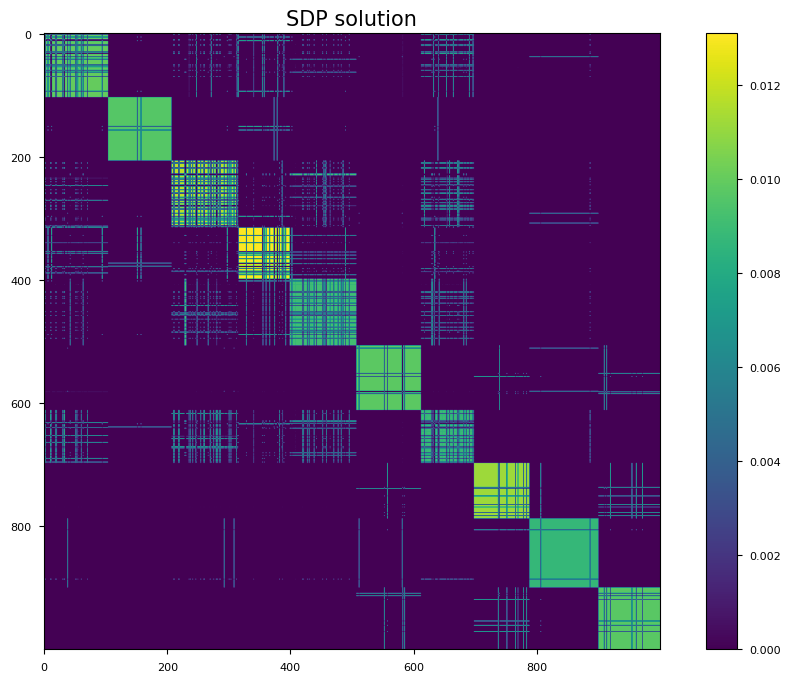

In [112]:
plot_func(iter_PDHG, f1_PDHG,f2_PDHG, obj_PDHG, X_PDHG, opt_val)

### Comparing HCGM and Vu-Condat

#### Question 2.2.6 (3 pt)

Plot the results with the function `plot_comp`. What are the final objective values? Are they below the optimal value provided to you in `opt_val`? If yes, explain the reason. Answer in the box below.

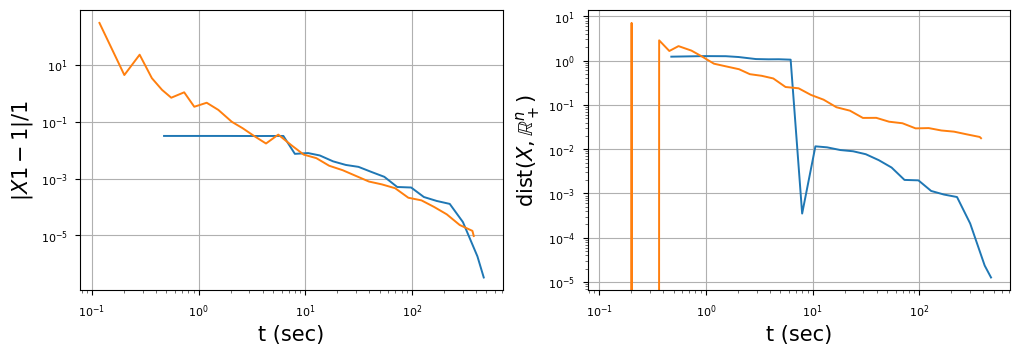

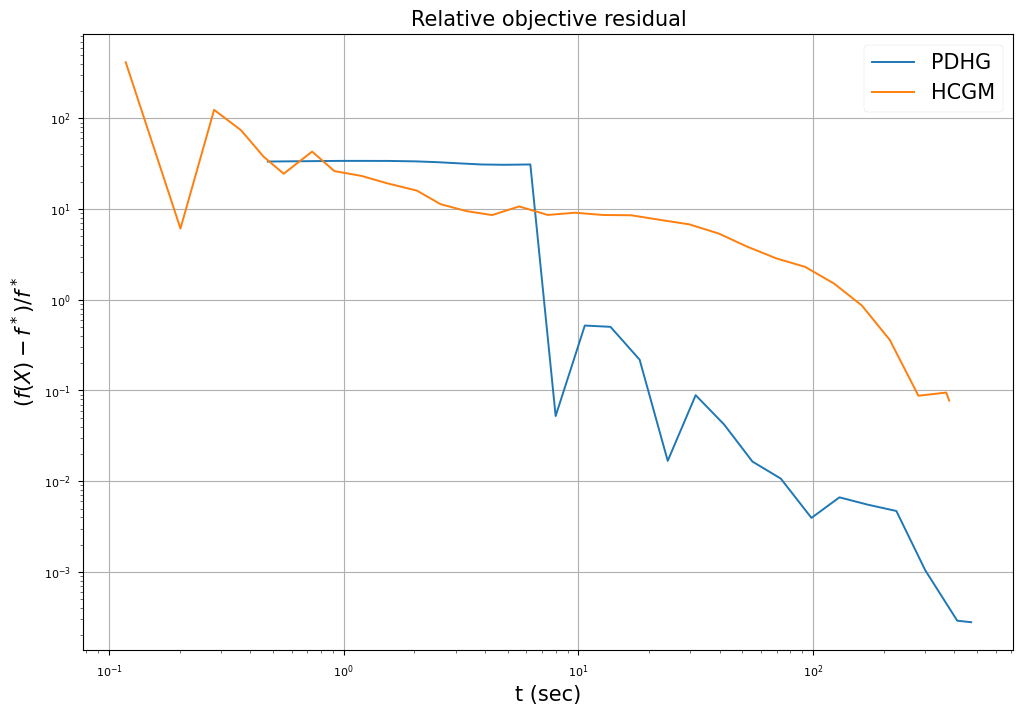

In [113]:
times = (time_PDHG, time_HCGM)
feas1 = (f1_PDHG, f1_HCGM)
feas2 = (f2_PDHG, f3_HCGM)
obj   = (obj_PDHG, obj_HCGM)
plot_comp(times, feas1,feas2, obj, opt_val)

<font color=‘blue’>
    
Write your answer here

#### Rounding: Get the assignments from the result of the SDP
Getting the assignments requires going back to the $10$ dimensional space discussed before, and using the coordinates multiplied with the obtained matrix to construct a "denoised" version of the data points. This allows then to find the clusters from these $10$ dimensional data. Our implementation is the python reimplementation of their matlab code which can be found on [github](https://github.com/solevillar/kmeans_sdp).

In [114]:
center_HCGM, assign_HCGM = sdp_rounding(X_HCGM,10, digits)
center_PDHG, assign_PDHG = sdp_rounding(X_PDHG,10, digits)

#### k-means value: HCGM & Vu-Condat

Using the function `value_kmeans`, run the cell below to obtain the $k$-means value before and after running both algorithms. 

    

In [115]:
k_means_before = value_kmeans(digits, labels-1) # k_means value with true labels
k_means_after_HCGM  = value_kmeans(digits, assign_HCGM) # k_means value with assigned lables
k_means_after_PDHG  = value_kmeans(digits, assign_PDHG) # k_means value with assigned lables

print('k-means value initial: {:.4f}'.format(k_means_before))
print('k-means value for HCGM: {:.4f}'.format(k_means_after_HCGM))
print('k-means value for Vu-Condat: {:.4f}'.format(k_means_after_PDHG))

k-means value initial: 150.9680
k-means value for HCGM: 28.7269
k-means value for Vu-Condat: 28.7269


#### Question 2.2.7 (3 pts) k-means value: Lloyd's algorithm

Run the function `kmeans` a few times and report the $k$-means value obtained by Llyod's algorithm. Compare it with the ones obtained by rounding the solution of convex methods `HCGM` and `PDHG`.  Comment on the result.

In [116]:
centers_Lloyd, classifications_Lloyd, k_means_Lloyd = kmeans(digits.T, 10)#k_means value with Lloyds k-means algorithm

print('k-means value for Lloyd''s algorithm: {:.4f}'.format(k_means_Lloyd))

k-means value for Lloyds algorithm: 202.7150


<font color=‘blue’>
    
Write your answer here

## OPTIONAL: Additional results for clustering fMNIST Data

### Misclassification rates: HCGM & Vu-Condat


**Dataset:** We use the fashion-MNIST data in (Xiao et al. 2017) which is released as
a possible replacement for the MNIST handwritten digits . Each data
point is a 28x28 grayscale image, associated with a label from 10
classes. Classes
are labeled from 0 to 9. First, we extract the meaningful features from
this dataset using a simple 2 layers neural network with a sigmoid
activation. Then, we apply neural network to 1000 test samples from the
same dataset, which gives us a vector $\mu \in \mathbb{R}^{10}$ where
each entry represents the probability being in that class. Then, we form
the pairwise distance matrix $\boldsymbol{C}$ by using this probability
vectors (In the code, you do not need to worry about any of the processing
    details mentioned here. You are directly given the matrix
    $\mathbf{C}$.).

In [117]:
print('Misclassification rate for HCGM: {:.4f}'.format(misclassification_rate(assign_HCGM, labels)))
print('Misclassification rate for Vu-Condat: {:.4f}'.format(misclassification_rate(assign_PDHG, labels)))

Misclassification rate for HCGM: 0.1250
Misclassification rate for Vu-Condat: 0.1250


### Visualize samples and predicted labels

In [118]:
classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [119]:
def vis_samples(assignment, images, labels):
    assignment=assignment.astype(int)
    classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
    labels = labels-1
    rand_samp = np.random.randint(0,1000,25)
    plt.figure(figsize=(7,7))
    for i,samp in enumerate(rand_samp):
        plt.subplot(5,5,i+1)
        plt.imshow(1-np.reshape(images[samp],[28,28]), cmap=plt.cm.gray)
        plt.title('Pred. {0}\n Orig. {1}'.format(classes[assignment[samp].item()],classes[labels[samp].item()]))
        plt.axis('off')
    plt.tight_layout()
    plt.show()

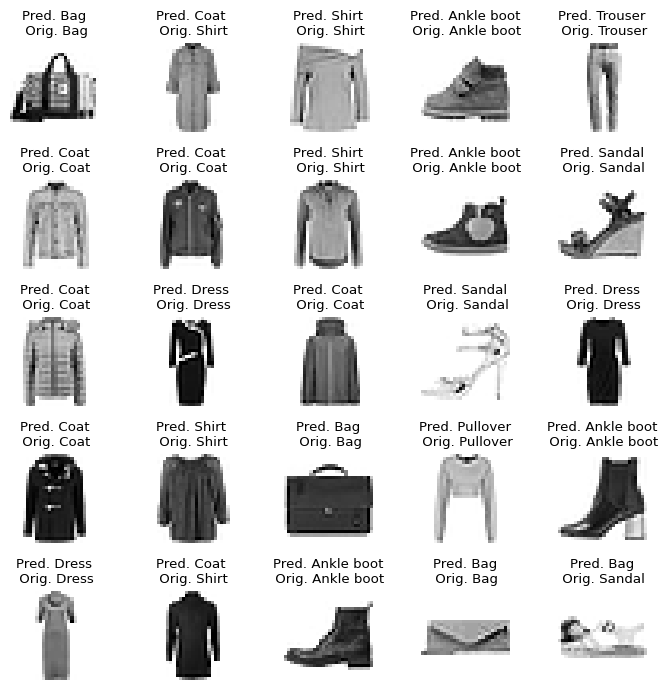

In [120]:
vis_samples(assign_HCGM, images,labels)

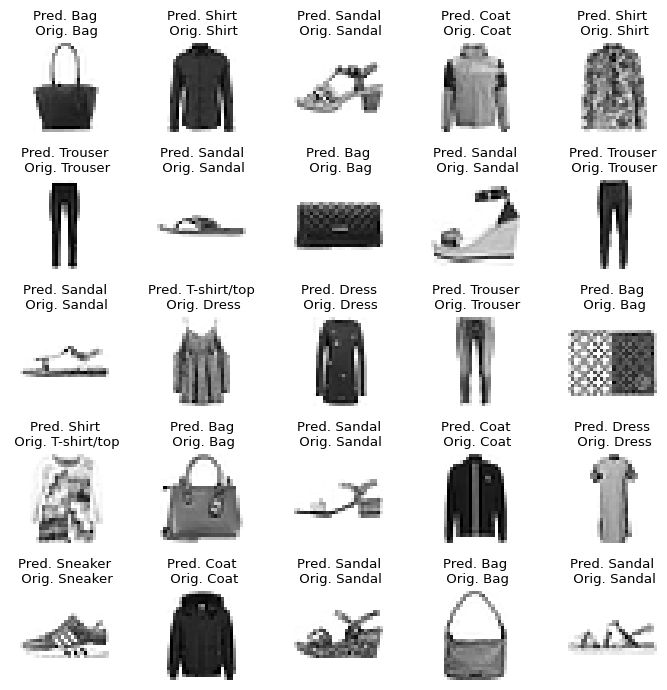

In [121]:
vis_samples(assign_PDHG, images,labels)

## References 

Xiao, Rasul & Vollgraf 2017,  Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms

Peng & Wei 2007, Approximating K-means-type clustering via semidefinite programming

Yurtsever, Fercoq, Locatello & Cevher 2018, A Conditional Gradient Framework for Composite Convex Minimization with Applications to Semidefinite Programming